# Module-4

## Query 4.1
Import the csv file of the stock which contained the Bollinger columns as well. 
Create a new column 'Call' , whose entries are - 
'Buy' if the stock price is below the lower Bollinger band 
'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 
'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 
'Short' if the stock price is above the upper Bollinger band.

Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)

Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("week3.csv")
df.dropna(axis=0, inplace=True)
df["mid band"]=(df["lower band"]+df["upper band"])/2

In [3]:
def call(val, i):
    if val<df["lower band"].values[i]:
        return ("Buy")
    elif val>df["lower band"].values[i] and val<df["mid band"].values[i]:
        return ("Hold Buy/ Liquidate Short")
    elif val>df["mid band"].values[i] and val<df["upper band"].values[i]:
        return ("Hold Short/ Liquidate Buy")
    else:
        return ("Short")

Call=[]
for j in range(df.shape[0]):
    Call.append(call(df["Close Price"].values[j], j))
df["Call"]=Call

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

x=[]
y=[]
for i in range(df.shape[0]):
    a=df["lower band"].values[i]
    b=df["upper band"].values[i]
    c=df["mid band"].values[i]
    d=df["Close Price"].values[i]
    x.append([a,b,c,d])
    y.append(df["Call"].values[i])

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=1/3, random_state=0)

In [5]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred=dtc.predict(x_test)
accuracy_dtc=accuracy_score(y_test, y_pred)*100
print("Accuracy through Decision Tree Classifier=",accuracy_dtc, "%")

Accuracy through Decision Tree Classifier= 79.375 %


In [6]:
knc=KNeighborsClassifier()
knc.fit(x_train, y_train)
y_pred=knc.predict(x_test)
accuracy_knc=accuracy_score(y_test, y_pred)*100
print("Accurcay through K-Neighbors Classifier=",accuracy_knc, "%")

Accurcay through K-Neighbors Classifier= 83.125 %


In [7]:
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred=rfc.predict(x_test)
accuracy_rfc=accuracy_score(y_test, y_pred)*100
print("Accuracy through Random Forest Classifier=",accuracy_rfc, "%")

Accuracy through Random Forest Classifier= 83.75 %


In [8]:
df1=pd.read_csv("ASHOKA.csv")

df1["14 day SMA"]=df1["Close Price"].rolling(14).mean()
df1["std deviation"]=df1["Close Price"].rolling(14).std()
df1["std deviation"]=df1["std deviation"]*2
df1["upper band"]=df1["14 day SMA"]+df1["std deviation"]
df1["lower band"]=df1["14 day SMA"]-df1["std deviation"]
df1["mid band"]=(df1["lower band"]+df1["upper band"])/2
df1.dropna(axis=0, inplace=True)

z=[]
for i in range(df1.shape[0]):
    a=df1["lower band"].values[i]
    b=df1["upper band"].values[i]
    c=df1["mid band"].values[i]
    d=df1["Close Price"].values[i]
    z.append([a,b,c,d])

Call=knc.predict(z)
df1["Call"]=Call
df1.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 day SMA,std deviation,upper band,lower band,mid band,Call
13,ASHOKA,EQ,01-Jun-2017,190.35,191.10,192.9,186.15,187.75,187.50,189.06,...,1.198017e+07,1427,39893,62.96,202.239286,18.648785,220.888071,183.590500,202.239286,Hold Short/ Liquidate Buy
14,ASHOKA,EQ,02-Jun-2017,187.50,188.20,193.5,188.20,190.00,190.25,190.46,...,1.690213e+07,1947,47272,53.27,200.396429,17.851846,218.248275,182.544583,200.396429,Hold Short/ Liquidate Buy
15,ASHOKA,EQ,05-Jun-2017,190.25,190.35,194.5,190.35,191.60,192.00,192.94,...,1.077437e+08,1894,528408,94.62,198.760714,16.252109,215.012823,182.508605,198.760714,Hold Short/ Liquidate Buy
16,ASHOKA,EQ,06-Jun-2017,192.00,192.25,193.7,185.10,188.20,187.60,188.63,...,1.803934e+07,2803,52811,55.22,196.660714,13.457350,210.118064,183.203364,196.660714,Hold Short/ Liquidate Buy
17,ASHOKA,EQ,07-Jun-2017,187.60,187.75,190.7,184.55,186.00,186.15,187.03,...,2.276620e+07,1810,83650,68.72,194.982143,12.289871,207.272014,182.692272,194.982143,Hold Short/ Liquidate Buy


## Query 4.2
Define 4 new columns , whose values are: 
% change between Open and Close price for the day, % change between Low and High price for the day, 5 day rolling mean of the day to day % change in Close Price and 5 day rolling std of the day to day % change in Close Price

Create a new column 'Action' whose values are: 
1 if next day's price(Close) is greater than present day's. 
(-1) if next day's price(Close) is less than present day's. 

Construct a classification model with the 4 new inputs and 'Action' as target.
Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model


In [9]:
df["% change bw open close"]=((df["Open Price"]-df["Close Price"])/df["Open Price"])*100
df["% change bw low high"]=((df["Low Price"]-df["High Price"])/df["Low Price"])*100
df["pct change"]=df["Close Price"].pct_change()*100
df["5 day rolling mean"]=df["pct change"].rolling(5).mean()
df["5 day rolling std"]=df["pct change"].rolling(5).std()
df.dropna(axis=0, inplace=True)

Action=[]
for i in range(df.shape[0]-1):
    if df["Close Price"].values[i+1]>df["Close Price"].values[i]:
        Action.append(1)
    else:
        Action.append(-1)
Action.append(1)
df["Action"]=Action

In [10]:
x=[]
y=[]
for i in range(df.shape[0]):
    a=df["% change bw open close"].values[i]
    b=df["% change bw low high"].values[i]
    c=df["5 day rolling mean"].values[i]
    d=df["5 day rolling std"].values[i]
    x.append([a,b,c,d])
    y.append(df["Action"].values[i])

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=1/3)
rfc.fit(x_train, y_train)
y_pred=rfc.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)*100
accuracy

49.685534591194966

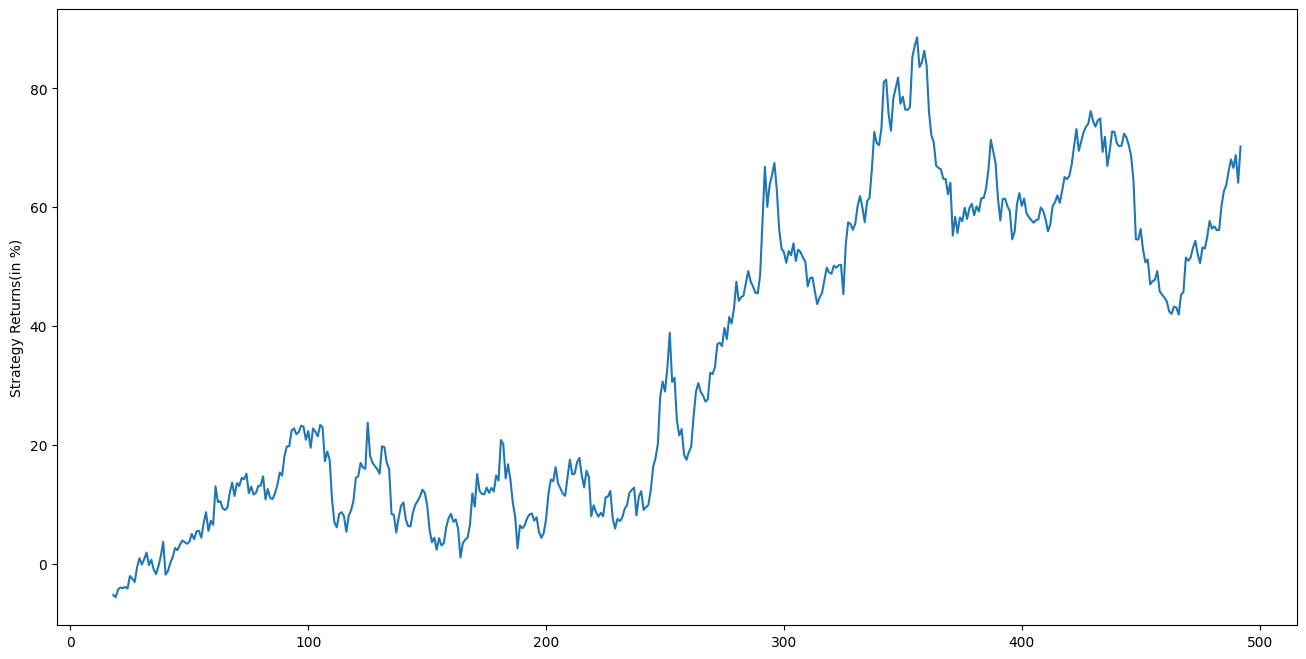

In [11]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16,8))
df["net cumulative returns(in %)"]=(((df["Open Price"]-df["Close Price"])/df["Open Price"])*100).cumsum()
plt.plot(df["net cumulative returns(in %)"])
plt.ylabel("Strategy Returns(in %)")
plt.show()

### Explaination:
In machine learning and statistics, classification is the problem of identifying to which of a set of categories (sub-populations) a new observation belongs, on the basis of a training set of data containing observations (or instances) whose category membership is known.

In the terminology of machine learning, classification is considered an instance of supervised learning, i.e., learning where a training set of correctly identified observations is available.

An algorithm that implements classification, especially in a concrete implementation, is known as a classifier. The term "classifier" sometimes also refers to the mathematical function, implemented by a classification algorithm, that maps input data to a category.